

# K-Nearest Neighbors (KNN) and Distance Metrics



---

## 1. Introduction to K-Nearest Neighbors (KNN)

Imagine this:

> You walk into a room of people and want to know if you're likely to enjoy a movie. You ask the 3 people standing closest to you (your "nearest neighbors") if they liked it. If 2 of them say "yes," you figure you'll probably like it too.

This is the intuition behind **K-Nearest Neighbors (KNN)**.

---

### What is KNN?

KNN is a **supervised machine learning algorithm** used for **classification** and **regression**.

* **K** stands for the number of neighbors to consider.
* For classification: It picks the class that is most common among the K closest points.
* For regression: It averages the target values of the K closest points.

---

### Why is it called a "Lazy Learner"?

Unlike other algorithms (like logistic regression or decision trees), KNN doesn’t learn anything during the training phase.

* It just memorizes the data.
* All the "learning" happens when a new data point needs to be classified.

---

## 2. How Does KNN Work?

Let’s break it into steps:

1. Choose the number **K** (how many neighbors to look at).
2. Calculate the **distance** from the new data point to all existing data points.
3. Identify the **K closest** points.
4. For classification: Look at their labels and **vote** for the most common.
5. For regression: Take the **average** of their values.

---

## 3. Distance Metrics (How do we find the "nearest"?)

### A. Euclidean Distance

Think of this as a straight-line ("ruler") distance between two points in space.

#### Formula:

$$
\text{Distance} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

This generalizes to n-dimensions as:

$$
\text{Distance} = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$



In [2]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

#### Python Equivalent:

In [3]:

point1 = np.array([1, 2])
point2 = np.array([4, 6])

distance = np.sqrt(np.sum((point1 - point2) ** 2))
print("Euclidean Distance:", distance)

Euclidean Distance: 5.0


---

### B. Manhattan Distance

This is like navigating a grid-like city: you can only move in straight lines (like a taxi in Manhattan).

$$
\text{Distance} = \sum_{i=1}^n |x_i - y_i|
$$

#### Python Equivalent:

In [4]:
manhattan_distance = np.sum(np.abs(point1 - point2))
print("Manhattan Distance:", manhattan_distance)

Manhattan Distance: 7


---

### C. Minkowski Distance (Generalized form)

$$
\text{Distance} = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
$$

* If **p = 1** → Manhattan
* If **p = 2** → Euclidean

In [5]:
def minkowski_distance(p1, p2, p=2):
    return np.sum(np.abs(p1 - p2) ** p) ** (1 / p)

print("Minkowski (p=3):", minkowski_distance(point1, point2, p=3))

Minkowski (p=3): 4.497941445275415


---

## 4. KNN in Action
Let’s classify flowers from the Iris dataset using KNN.

In [6]:
# Load data
X, y = load_iris(return_X_y=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
model = KNeighborsClassifier(n_neighbors=3)  # Try different values of K!
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


---

### Visualizing the Effect of K

Try different values of K (1, 3, 5, 7…) and compare the model’s performance.
Small K → more variance
Large K → more bias

---

## 5. Pros and Cons of KNN

**Pros**:

* Simple and intuitive
* No training phase
* Works well with small datasets

**Cons**:

* Slow with large datasets
* Sensitive to irrelevant features and feature scaling
* Doesn't handle high-dimensional data well

---

## 6. Real-World Analogy

> Think of KNN like asking your neighbors where to eat.
> If you ask 1 person, you might get a bad answer.
> Ask 10 people? You’ll probably find the best local spot.
> But if you ask 1000 random people on the internet, it might get noisy again!

---

# Finding the Best Value for K in K-Nearest Neighbors (KNN)

## Why is Choosing K Important?

Let’s say you're in a new town and want to know if a restaurant is good.

* If you ask **only one person (K = 1)**, you might get unlucky and ask someone with very unusual taste.
* If you ask **100 people**, you’ll get more stable opinions, but you might include folks who haven’t even eaten there!

**This is what the "K" in KNN controls** - how many neighbors we ask before making a decision.

---

## What Happens When K is Too Small or Too Big?

| K Value              | Outcome                                                                                                   |
| -------------------- | --------------------------------------------------------------------------------------------------------- |
| Very small (e.g., 1) | Model becomes too sensitive to noise. It may learn patterns that don’t generalize well. (**Overfitting**) |
| Very large           | The model becomes too “blurry.” It averages too much and misses local patterns. (**Underfitting**)        |

We need to **find a balance**. That's what choosing the best K is all about.

---

## How Do We Choose the Best K?

We use a technique called **Cross-Validation**.

### What is Cross-Validation?

Instead of training and testing once, we **split the data multiple times**, train and test on each, then average the results. This helps us **test our model more fairly**.

We’ll try many values of K (e.g., K=1 to K=20) and pick the one with the best **average accuracy**.

---

## Example

* `load_iris`: loads a classic dataset with flower measurements.
* `cross_val_score`: tests our model with cross-validation.
* `KNeighborsClassifier`: the KNN model we’ll use.
* `matplotlib.pyplot`: used to create the plot.
* `numpy`: helps us find the best K numerically.

---

In [7]:
# Load the data
X, y = load_iris(return_X_y=True)

* `X` is our dataset (measurements of petals and sepals).
* `y` is the label (which flower it is).

---

In [8]:
# Try different K values from 1 to 20
k_range = range(1, 21)
cv_scores = []  # to store the average accuracy for each K

We're testing each K from 1 to 20 and storing how well the model performs.

---

In [9]:
# Loop through each K, train the model, and record accuracy
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

* For each value of K:

  * We create a model using that K.
  * We evaluate its accuracy using 5-fold cross-validation.
  * We save the **average score**.

---

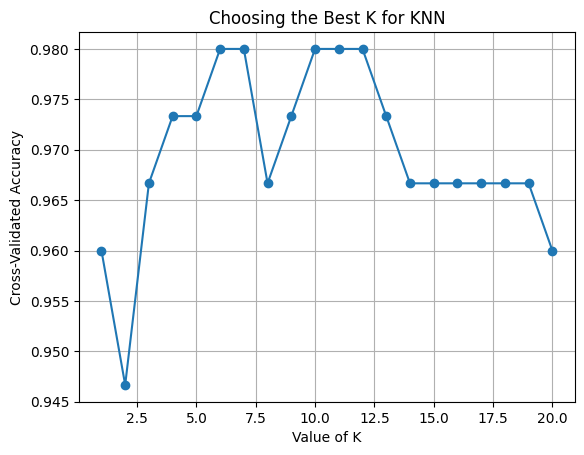

In [10]:
# Plotting the K values vs their cross-validation accuracy
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the Best K for KNN')
plt.grid(True)
plt.show()

* This plot helps us **visually see** which K gave us the best accuracy.

---

In [11]:
# Print the best K
best_k = k_range[np.argmax(cv_scores)]
print(f"The best value for K is: {best_k}")

The best value for K is: 6


* This finds the K with the highest average accuracy.
* `np.argmax()` gives the index of the best score in `cv_scores`.

---

## What Does the Plot Tell Us?

* The **x-axis** shows K values.
* The **y-axis** shows how accurate each model was.
* The **highest point** on the plot tells us the best K.

The best K **might not be 1 or 20**. It depends on the data. Often, **K = 3, 5, or 7** gives a good balance.

---

## Summary

* **K controls how many neighbors the model uses to make a prediction.**
* **Too small K**: overfits (too sensitive to noise).
* **Too large K**: underfits (too generic).
* We use **cross-validation** to find the K with the best average performance.

---

## Exercise

> Try the same code using `K = 1 to 50` and see:
>
> * Which K gives the highest score?
> * What happens to accuracy as K gets larger?

You can also **try the same on a different dataset** (like the Breast Cancer dataset from `sklearn.datasets`).

---


# K-Nearest Neighbors (KNN) – Regression, Bias-Variance Tradeoff, and Distance Metrics

---

## Part 1: K-Nearest Neighbors (KNN) for Regression

---

### What is KNN?

Imagine you're new in a neighborhood and want to estimate how much your house might be worth. You don’t know, but you look at prices of **houses nearby that are similar**. You say:

> “Let me look at the 3 (or 5, or 7) nearest houses and take the **average price** - that should be close to mine.”

That’s the idea behind **K-Nearest Neighbors**. It’s a **lazy learning algorithm** - it doesn’t learn a model in advance. It just stores the training data, and whenever you give it a new input, it:

1. Looks at the `k` nearest neighbors (based on distance).
2. Takes the **average of their outputs** (for regression).
3. Returns that as the predicted value.

---

### Step-by-Step Code Example (KNN for Regression)

Let’s generate a synthetic dataset.

In [12]:
# Create curved data
X = np.linspace(0, 10, 100).reshape(-1, 1)   # 100 points between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # sine curve with noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### Training KNN for Regression

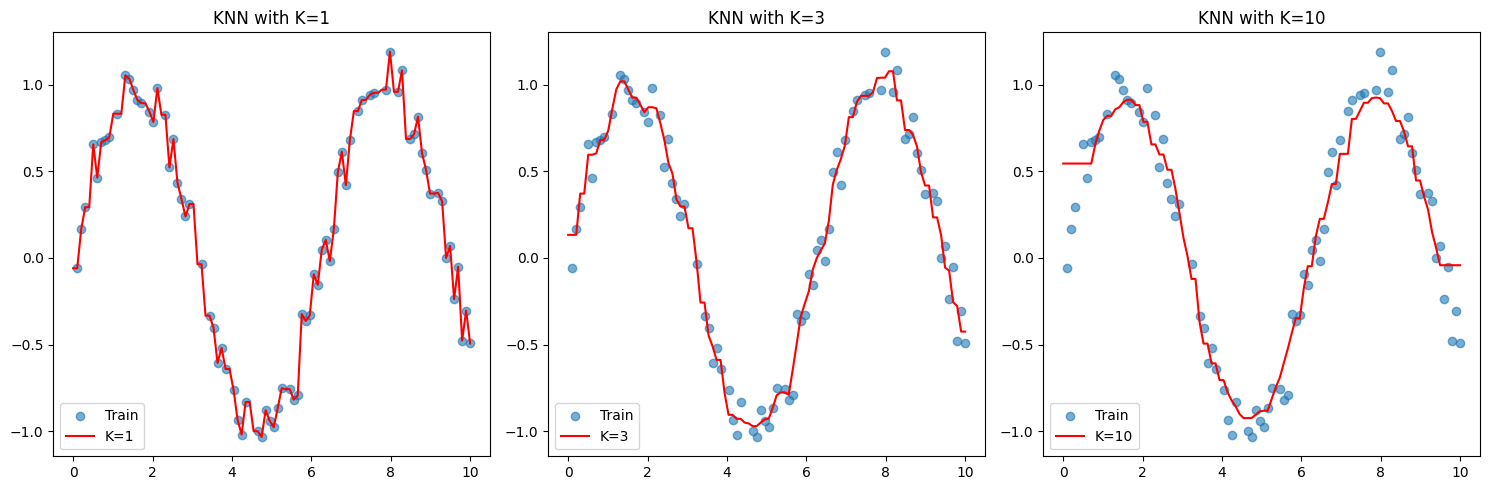

In [13]:
# Try different values of k
k_values = [1, 3, 10]

plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, label="Train", alpha=0.6)
    plt.plot(X, y_pred, color='red', label=f'K={k}')
    plt.title(f'KNN with K={k}')
    plt.legend()

plt.tight_layout()
plt.show()

---

### Explanation

* **K=1**: The model memorizes the training data. Very flexible, but may overfit (too sensitive to noise).
* **K=3 or 10**: Smoother predictions. May generalize better.

---

## Part 2: Bias-Variance Tradeoff in KNN

---

### Analogy

Think of shooting arrows at a target:

* **High Bias**: All arrows miss the center and are in one place - the model is too simple.
* **High Variance**: Arrows go everywhere, even far from the target - the model is too complex.

KNN gives a great visual way to understand this.

---

### Visualizing Bias vs Variance in KNN

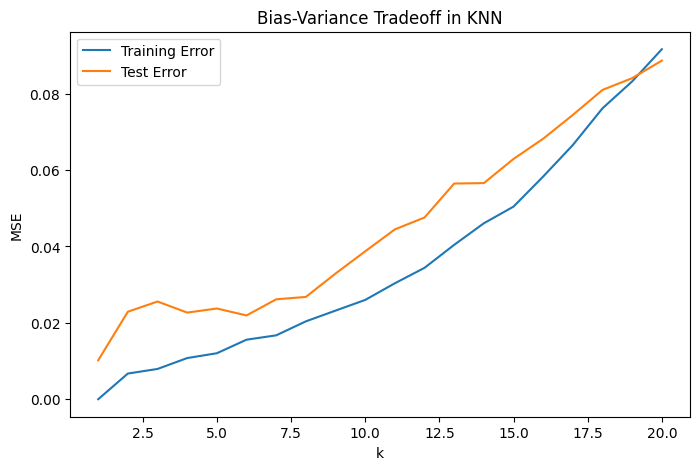

In [14]:
train_errors = []
test_errors = []

k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(8,5))
plt.plot(k_range, train_errors, label='Training Error')
plt.plot(k_range, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff in KNN')
plt.legend()
plt.show()

### What this shows:

* **Low k** (e.g., 1) = low training error, high test error → Overfitting → High Variance
* **High k** (e.g., 20) = high training error, but test error improves → Underfitting → High Bias

We’re looking for the **sweet spot** where both errors are low.

---

## Part 3: Distance Metrics

---

### How Does KNN Decide Who is “Nearest”?

It uses a **distance formula** - usually **Euclidean distance**.

### Euclidean Distance Formula (Between 2 Points):

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

### Python Equivalent:

In [15]:
point1 = np.array([3, 4])
point2 = np.array([0, 0])

distance = np.sqrt(np.sum((point1 - point2)**2))
print(distance)  # Output: 5.0

5.0


Other distance types:

* **Manhattan Distance**: Like walking in a city grid.
* **Minkowski Distance**: Generalized distance (includes both Euclidean and Manhattan).

In `KNeighborsRegressor`, you can specify distance using `metric='minkowski'`, and the `p` parameter controls the type:

* `p=1` → Manhattan
* `p=2` → Euclidean

---

## Exercises

1. Train a `KNeighborsRegressor` with `k=5` on noisy sine data. Plot predictions.
2. Modify the code to try `p=1` (Manhattan distance). How do results change?
3. Plot training and test error curves for values of `k` from 1 to 20.
4. In your own words: What happens when k is too low? What happens when k is too high?

---

## Summary

* KNN makes predictions based on nearby training points.
* K is the number of neighbors. Choosing it wisely balances **bias and variance**.
* Distance metrics define “nearness”. Euclidean is common, but others exist.
* KNN is **non-parametric** - it stores data, doesn’t learn parameters like in linear models.
* Visualization is key in understanding its strengths and weaknesses.

---

Great! Let’s now continue with:

---

#  K-Nearest Neighbors (KNN) for Classification

*Comparing KNN with Logistic Regression and Decision Trees*

---

## 1. Introduction: KNN for Classification

Let’s say you're at a party and you don’t know anyone. You notice a few people dancing energetically and wearing bright clothes - you assume they’re likely to be extroverts. Then you see others sitting in a quiet corner with a book - likely introverts.

Without asking anyone, you’ve already **classified** them based on their **closest behavior or appearance** - that’s what KNN classification does.

---

## 2. How It Works

For **classification**, KNN works like this:

1. Look at the `k` closest training data points to a new input.
2. Count how many of each class are among those neighbors.
3. Predict the class that occurs the most.

---

## 3. Example: KNN Classification on Iris Dataset

Let’s use the Iris dataset (famous flower dataset with 3 types of flowers).

In [16]:
# Load dataset
iris = load_iris()
X = iris.data  # features: sepal/petal size
y = iris.target  # class: 0=setosa, 1=versicolor, 2=virginica

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

---

### Evaluate the Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



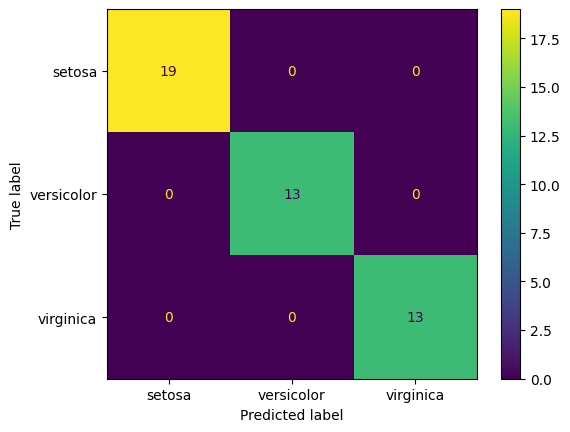

In [17]:
# Classification report (accuracy, precision, recall, F1)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)

---

## 4. How KNN Compares to Logistic Regression and Decision Trees

| Feature                | KNN                                | Logistic Regression     | Decision Trees           |
| ---------------------- | ---------------------------------- | ----------------------- | ------------------------ |
| **Learning Type**      | Lazy (no model until predict time) | Eager (learns weights)  | Eager (builds tree)      |
| **Interpretability**   | Low                                | High (see coefficients) | Medium (visual tree)     |
| **Speed (Prediction)** | Slower with large data             | Fast                    | Fast                     |
| **Works well with**    | Small datasets, clean data         | Linearly separable data | Complex rules and splits |
| **Sensitive to Noise** | Very                               | Somewhat                | Yes (can overfit)        |

---

### Visual Example of Decision Boundaries

Let’s compare decision boundaries of all three:

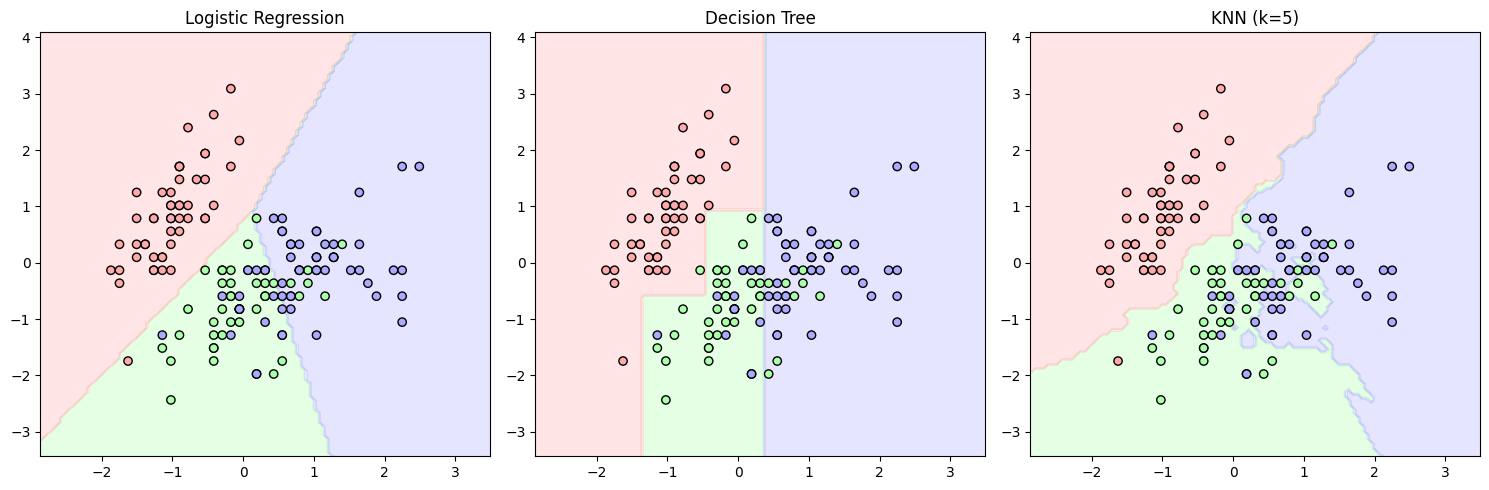

In [18]:
# Reduce dataset to 2 features for visualization
X = X[:, :2]

# Scale features for better visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5)
}

# Plotting function
def plot_decision_boundary(model, X, y, title, ax):
    model.fit(X, y)
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    ax.set_title(title)

# Plot all models
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundary(model, X_scaled, y, name, ax)

plt.tight_layout()
plt.show()

---

## 5. How to Choose the Best Model?

Use:

* **Cross-validation**: Split data multiple times and average performance.
* **Metrics**: Accuracy, Precision, Recall, F1-Score.
* **Domain knowledge**: What does the data mean? What’s the cost of wrong prediction?

---

## 6. Exercises

1. Change `k` from 5 to 1 and 15 in the `KNeighborsClassifier`. Observe performance changes.
2. Add noise to the Iris dataset and compare how Logistic Regression, Decision Tree, and KNN handle it.
3. Use `GridSearchCV` to find the best `k` for KNN.
4. Try KNN on a different dataset like Titanic (after encoding).

---

## Summary

* KNN classifies by looking at the majority label of neighbors.
* Choosing `k` affects bias and variance.
* Compared to Logistic Regression and Decision Trees, KNN is simpler but slower on large datasets.
* Visualizing decision boundaries helps see model behavior.

---